# Цель проекта: Разработать ML-модель, которая определяет клиентов, склонных к уходу от оператора связи, что позволяет удерживать ценных клиентов и сокращать потери.

## Знакомство с данными - проверка структуры таблицы, типов данных, наличия пропусков и общего содержания датасета.

In [1]:
import pandas as pd  # Импорт библиотеки Pandas для работы с табличными данными
import numpy as np   # Импорт библиотеки NumPy для работы с числовыми вычислениями и массивами

In [74]:
df = pd.read_csv(r"C:\Users\leono\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
'customerID': 'ID_клиента',
'gender': 'Пол',
'SeniorCitizen': 'Пенсионер',
'Partner': 'Партнер',
'Dependents': 'Иждивенцы',
'tenure': 'Срок_обслуживания',
'PhoneService': 'Телефонная_служба',
'MultipleLines': 'Множественные_линии',
'InternetService': 'Интернет_провайдер',
'OnlineSecurity': 'Онлайн_безопасность',
'OnlineBackup': 'Онлайн_резервное_копирование',
'DeviceProtection': 'Защита_устройства',
'TechSupport': 'Техническая_поддержка',
'StreamingTV': 'Потоковое_TV',
'StreamingMovies': 'Потоковые_фильмы',
'Contract': 'Контракт',
'PaperlessBilling': 'Безбумажный_биллинг',
'PaymentMethod': 'Способ_оплаты',
'MonthlyCharges': 'Ежемесячные_платежи',
'TotalCharges': 'Общие_платежи',
'Churn': 'Отток'

In [3]:
df.head(5)  # первые 5 строк датасета

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail(5)  # последние 5 строк датасета  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()   # общая информация о данных (типы, пропуски)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()  # количество пропусков в каждом столбце

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns  # список всех названий колонок

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Подготовка и визуальный анализ данных

In [8]:
# Импорт необходимых библиотек
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
dfe = df.apply(LabelEncoder().fit_transform)  # Преобразование всех категориальных признаков в числовые

In [76]:
dfe.head(5)  # Просмотр первых 5 строк преобразованного датафрейма

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


In [11]:
# Функция для построения countplot с настройками
def f(Data, x_column, hue_column):
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.countplot(data=Data, x=x_column, hue=hue_column, ax=ax)
    ax.grid()
    ax.legend(fontsize=25)
    ax.set_ylabel(x_column)
    ax.set_xlabel(hue_column)
    for container in ax.containers:
        ax.bar_label(container, fontsize=20)
    return fig, ax

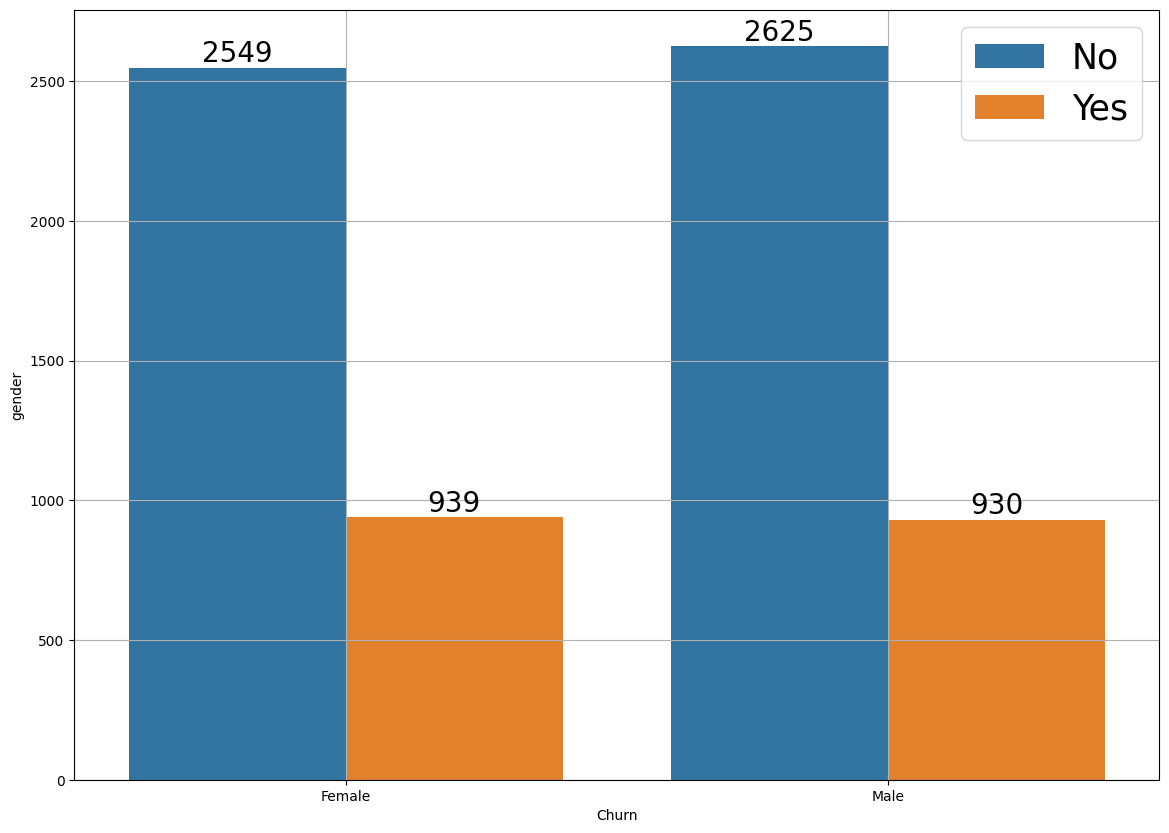

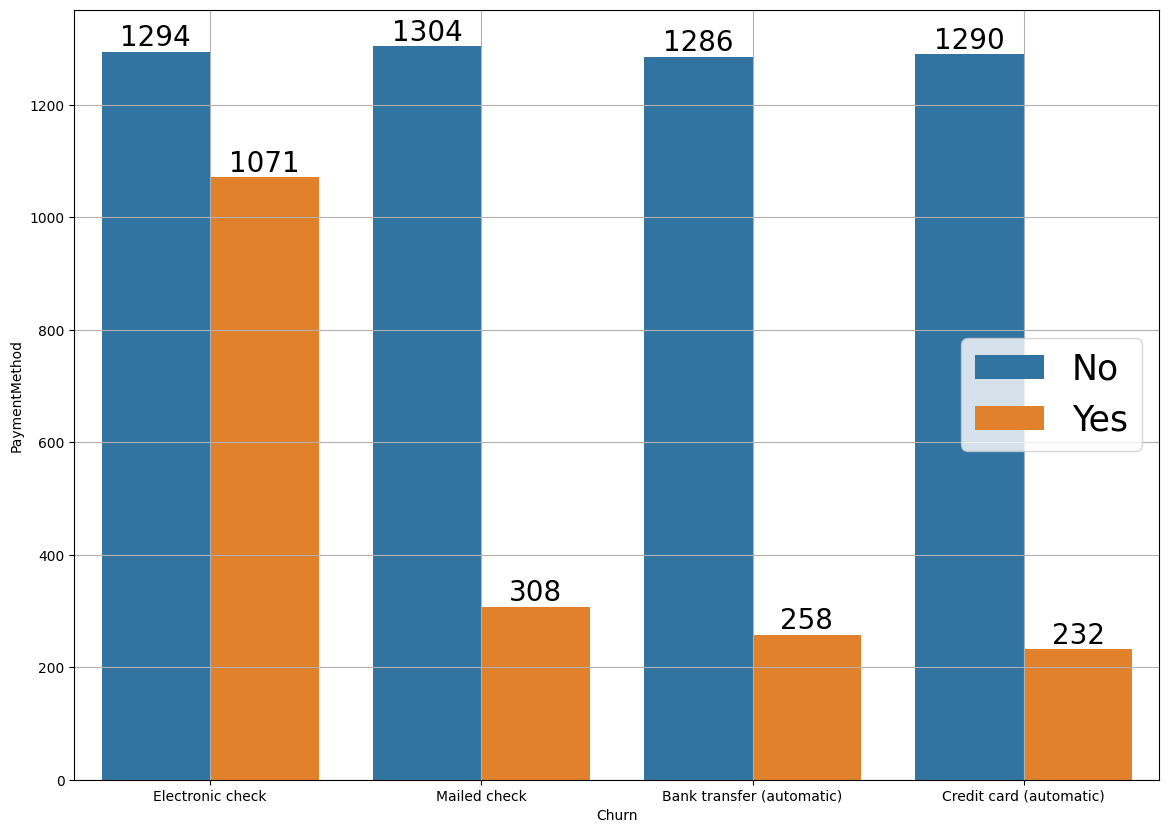

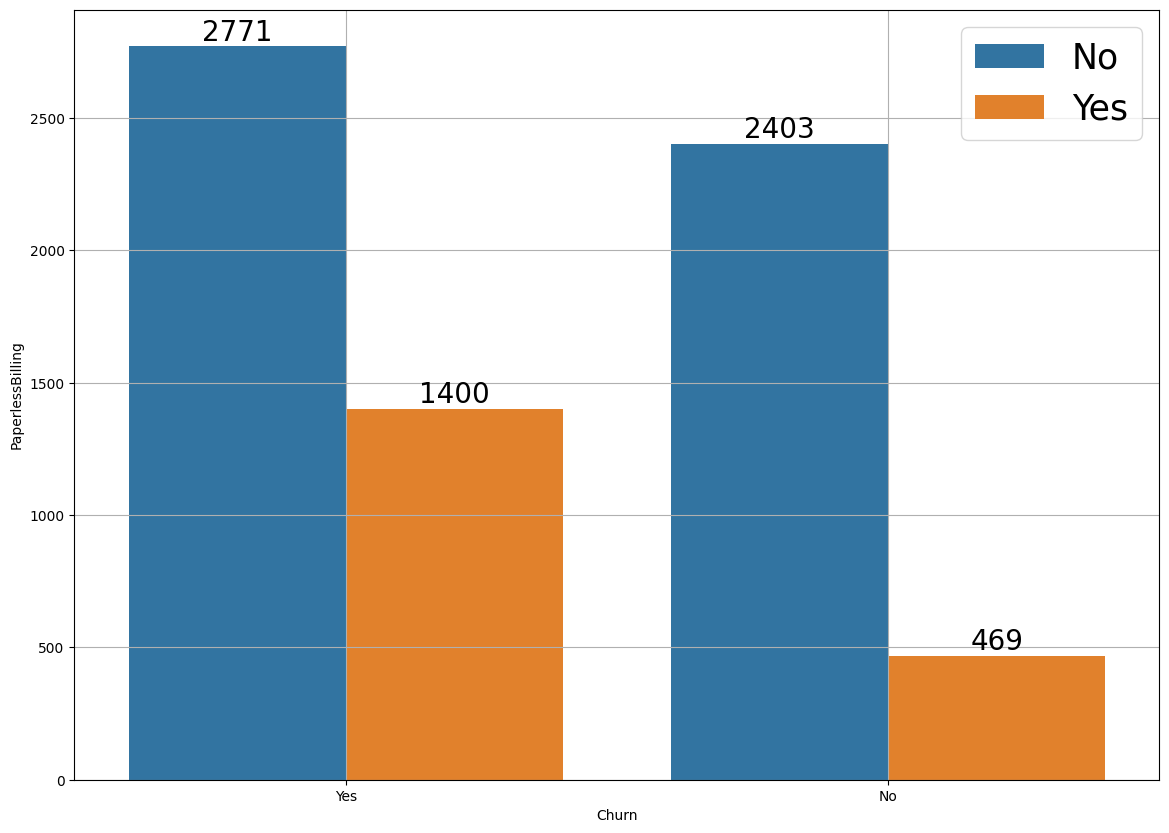

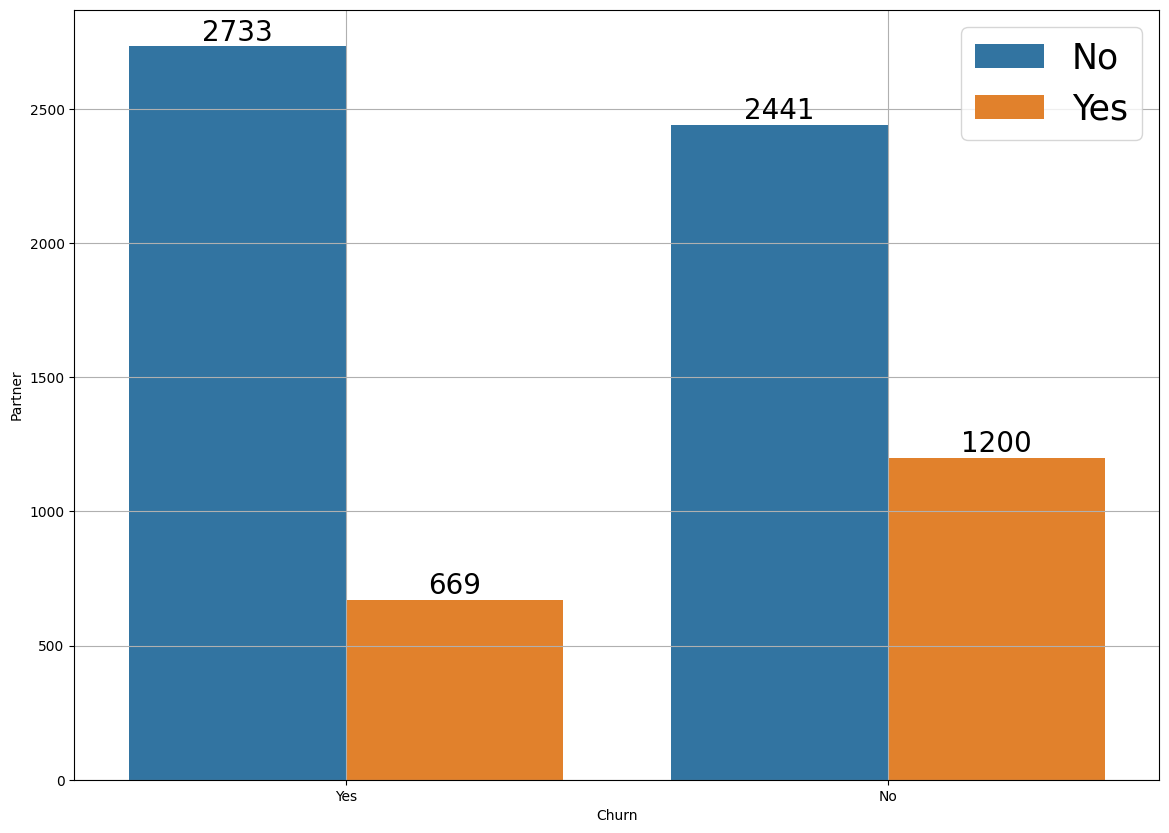

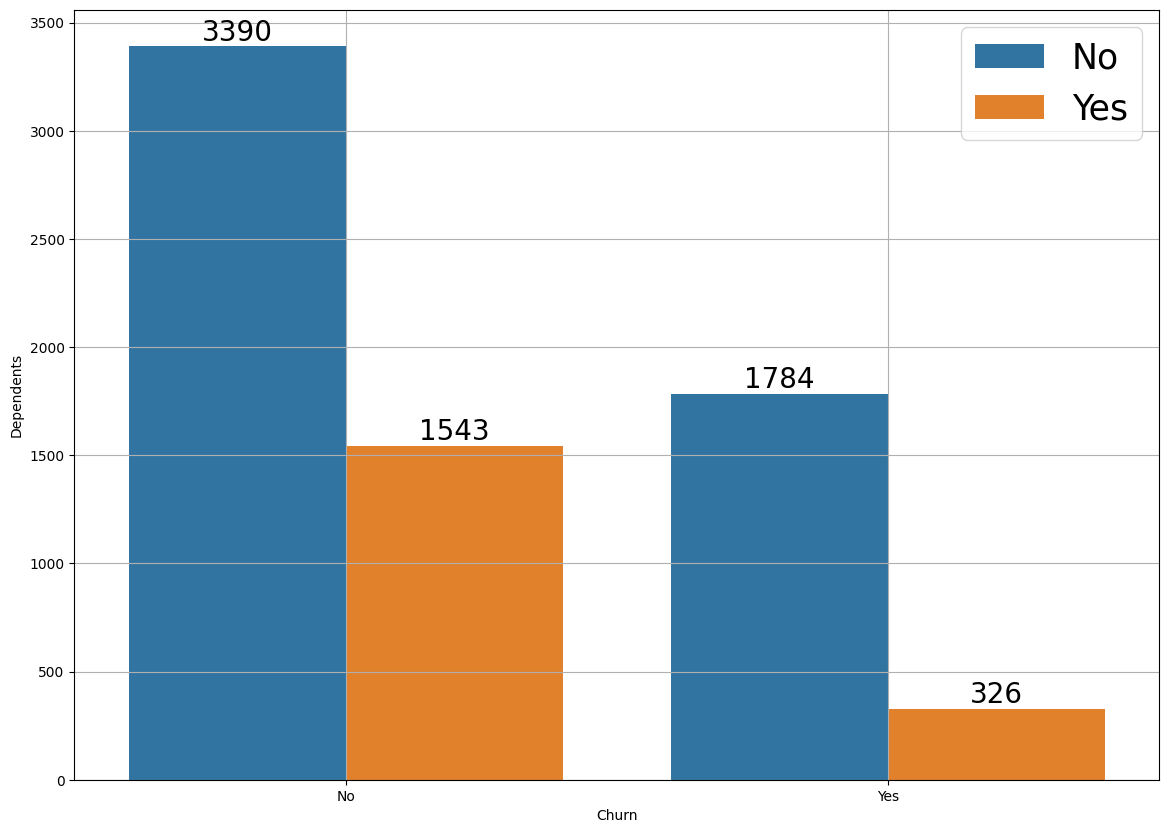

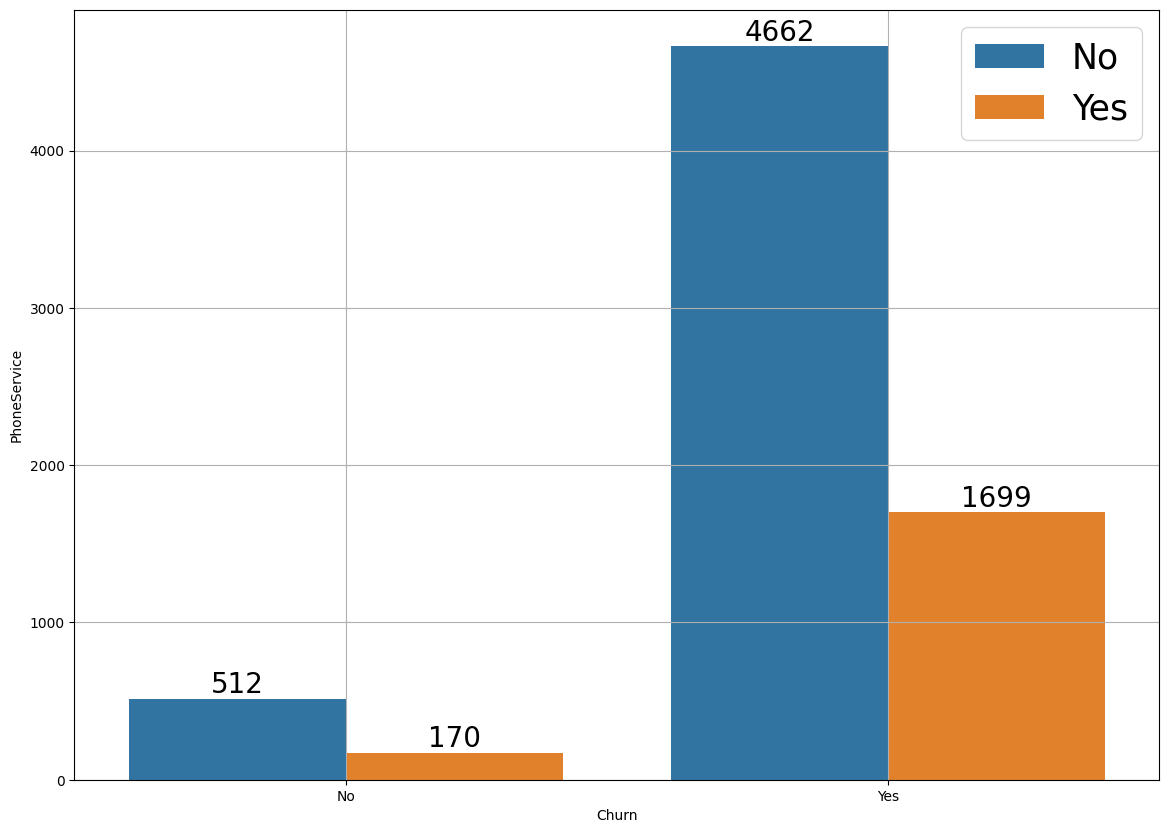

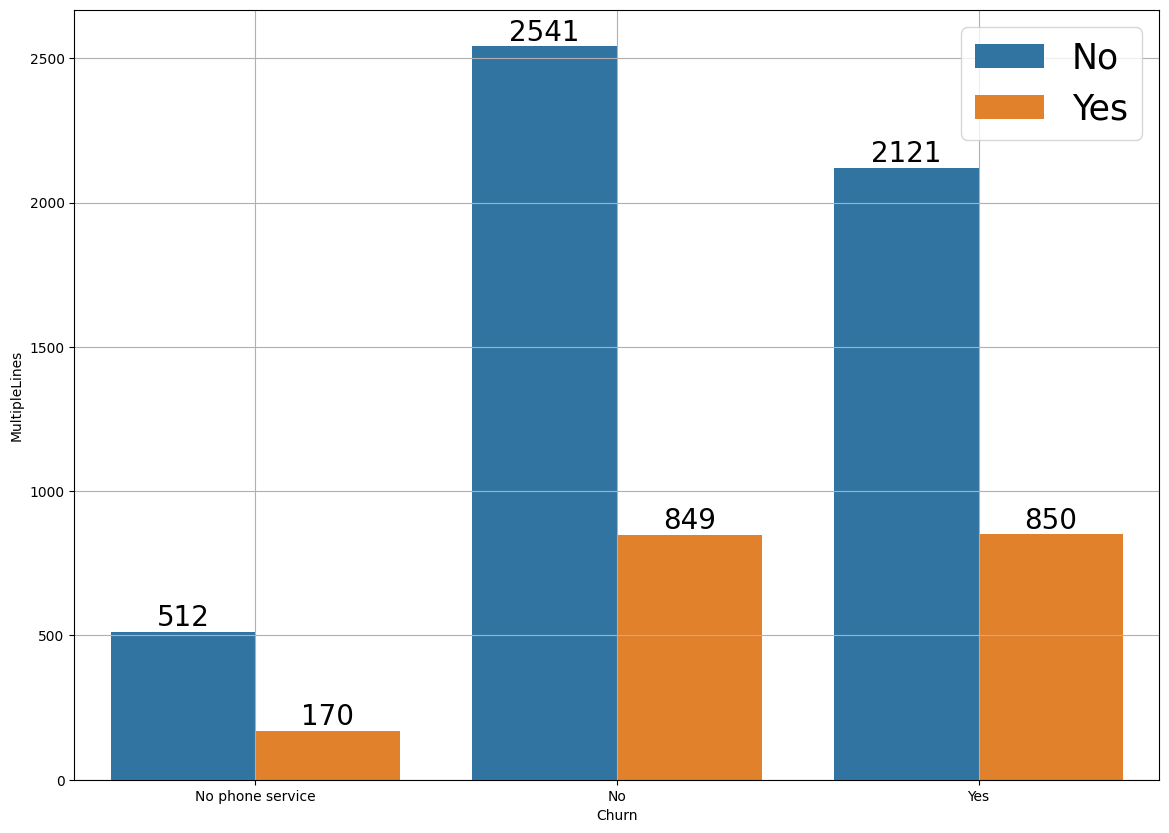

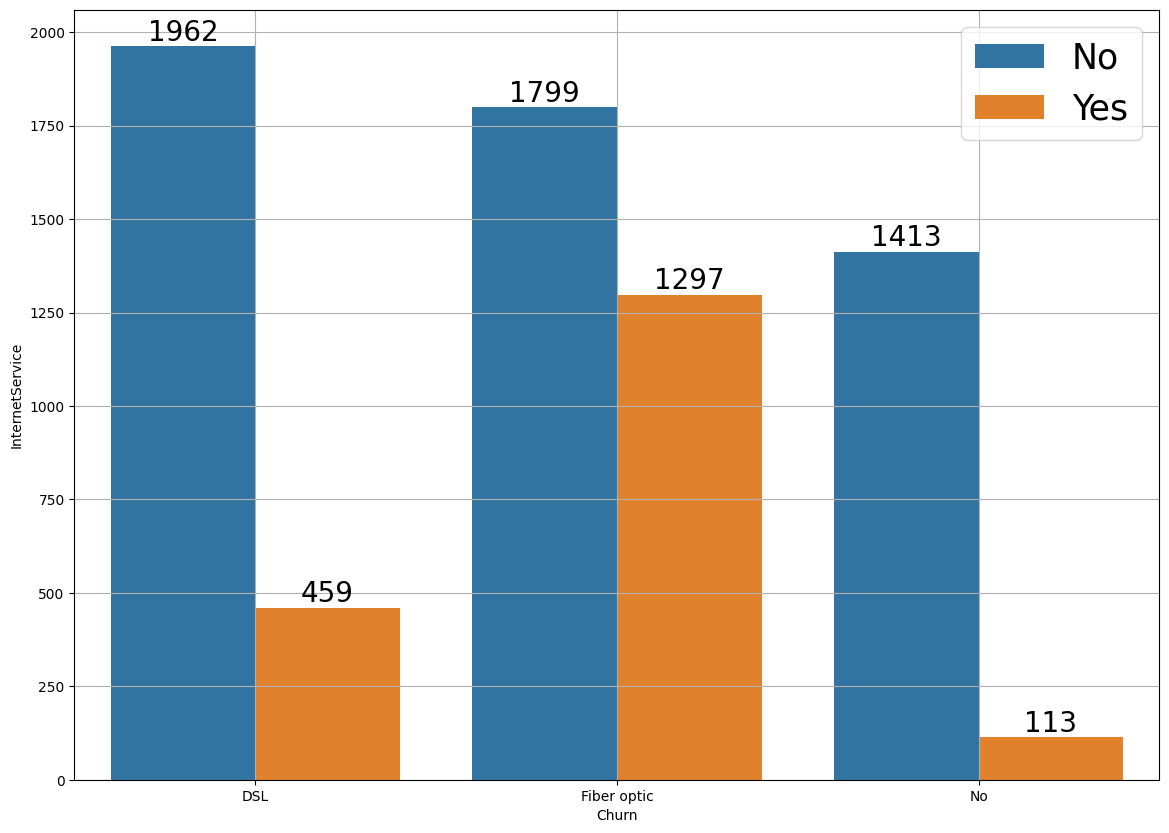

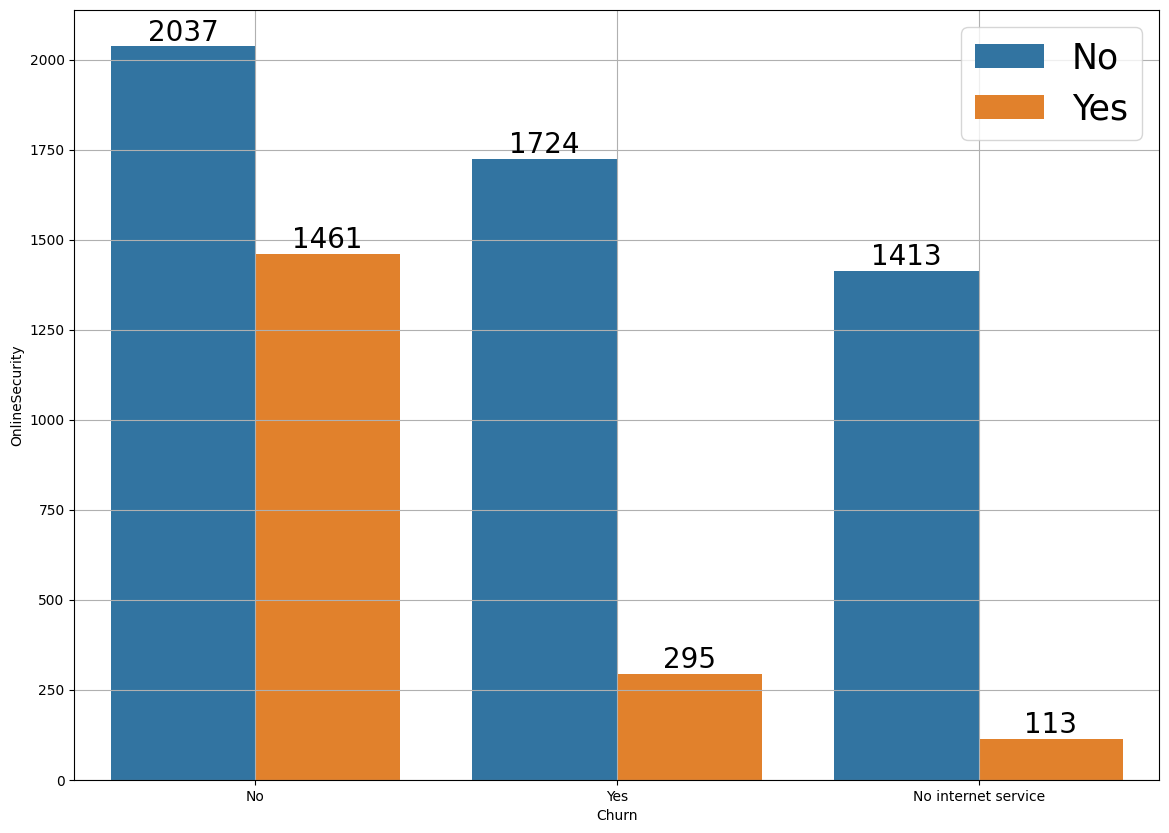

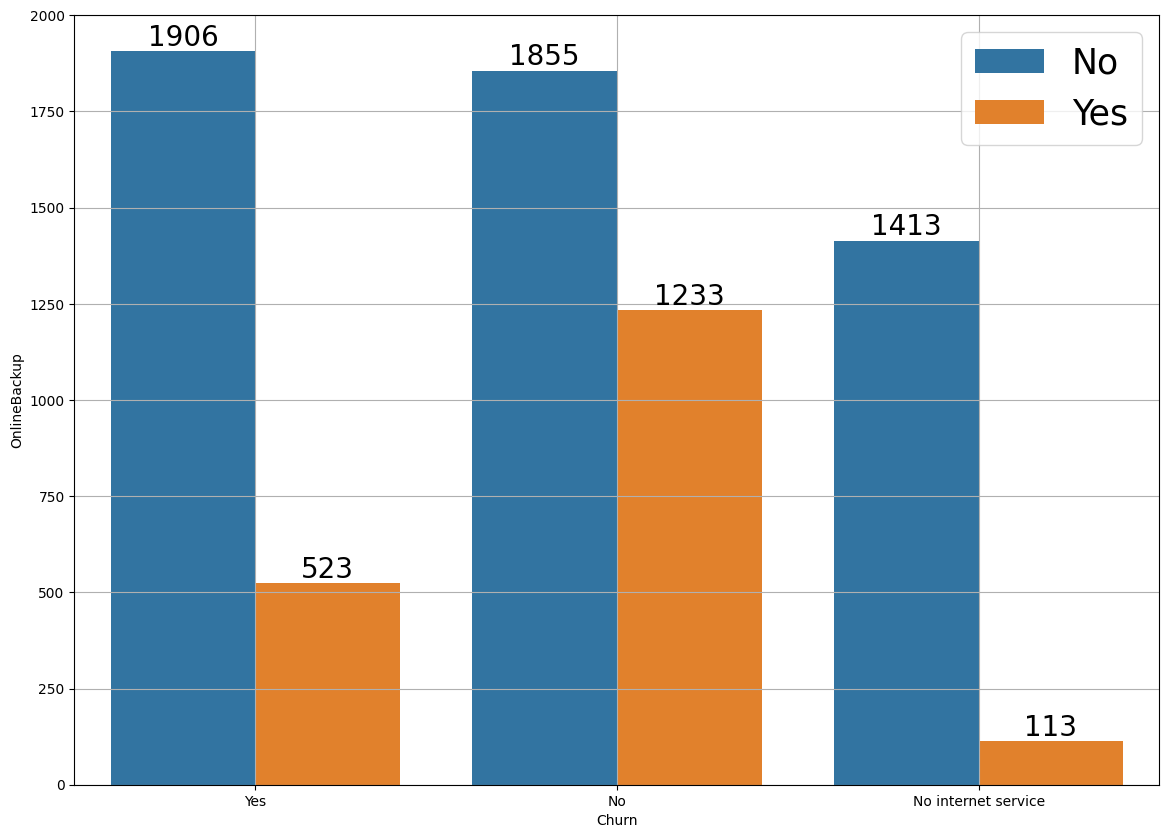

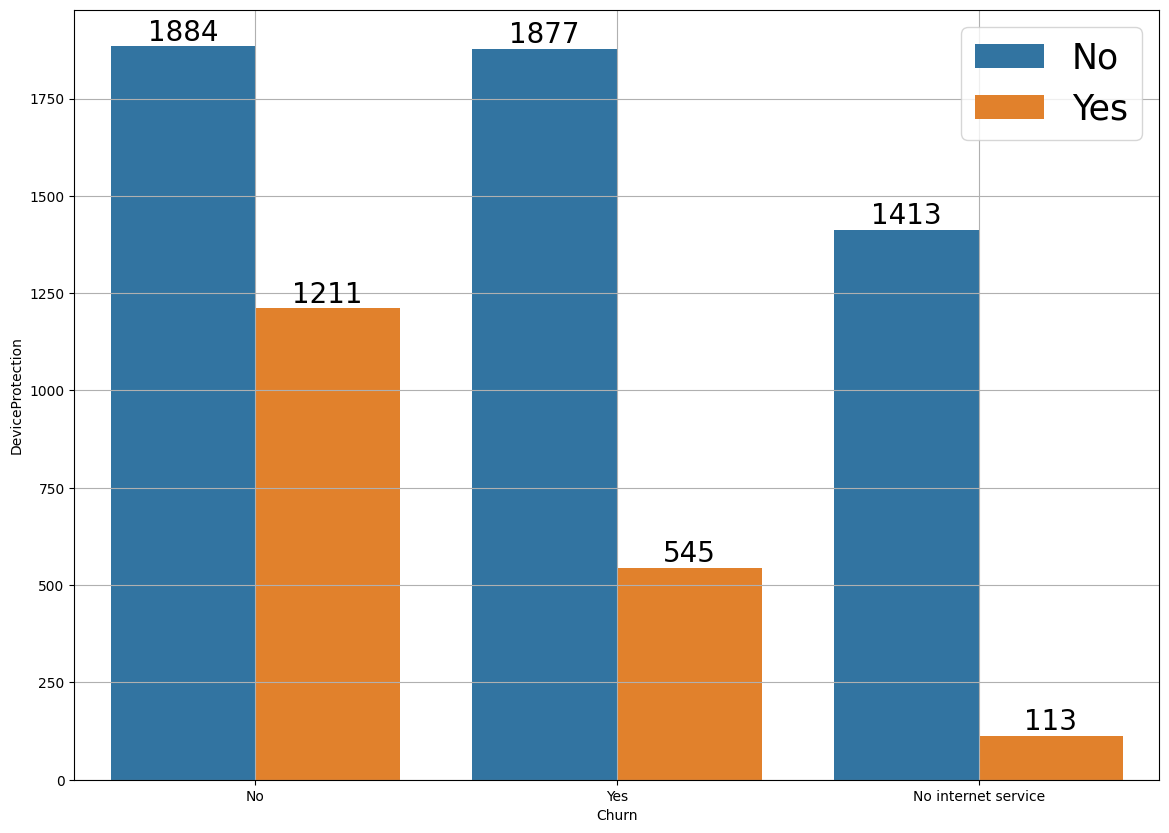

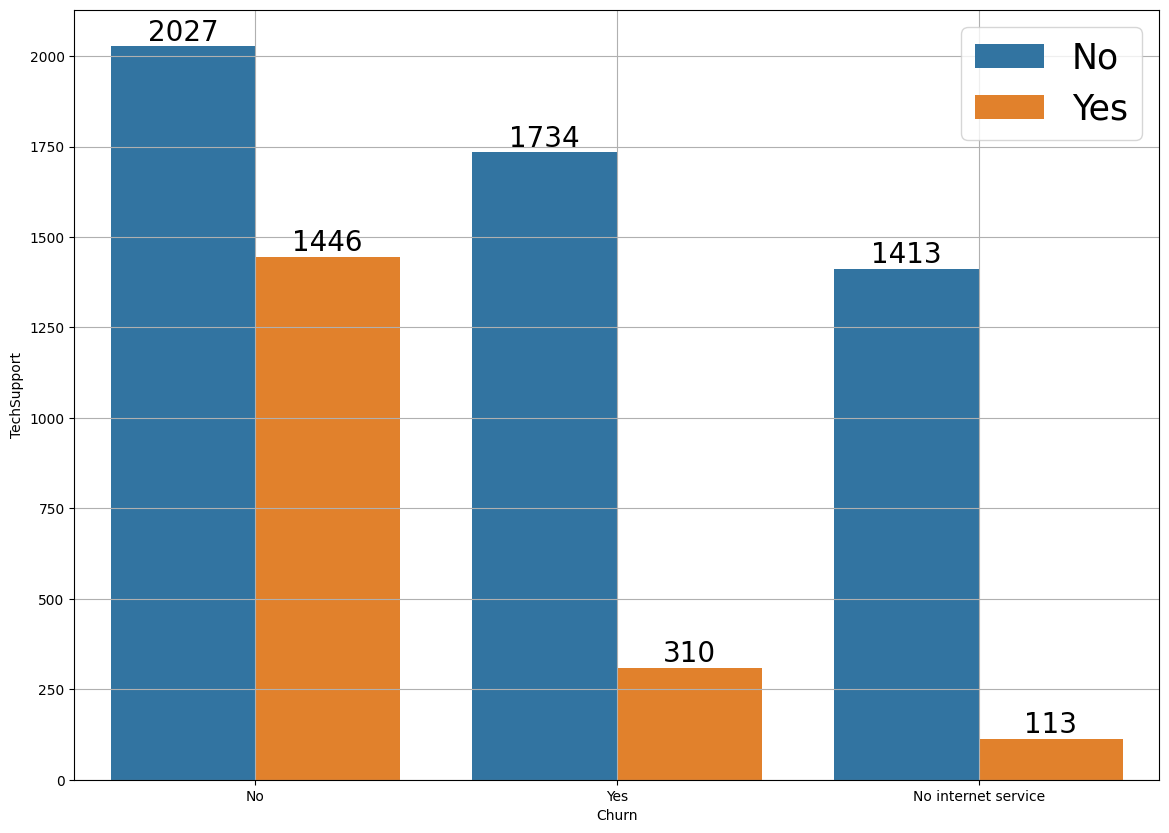

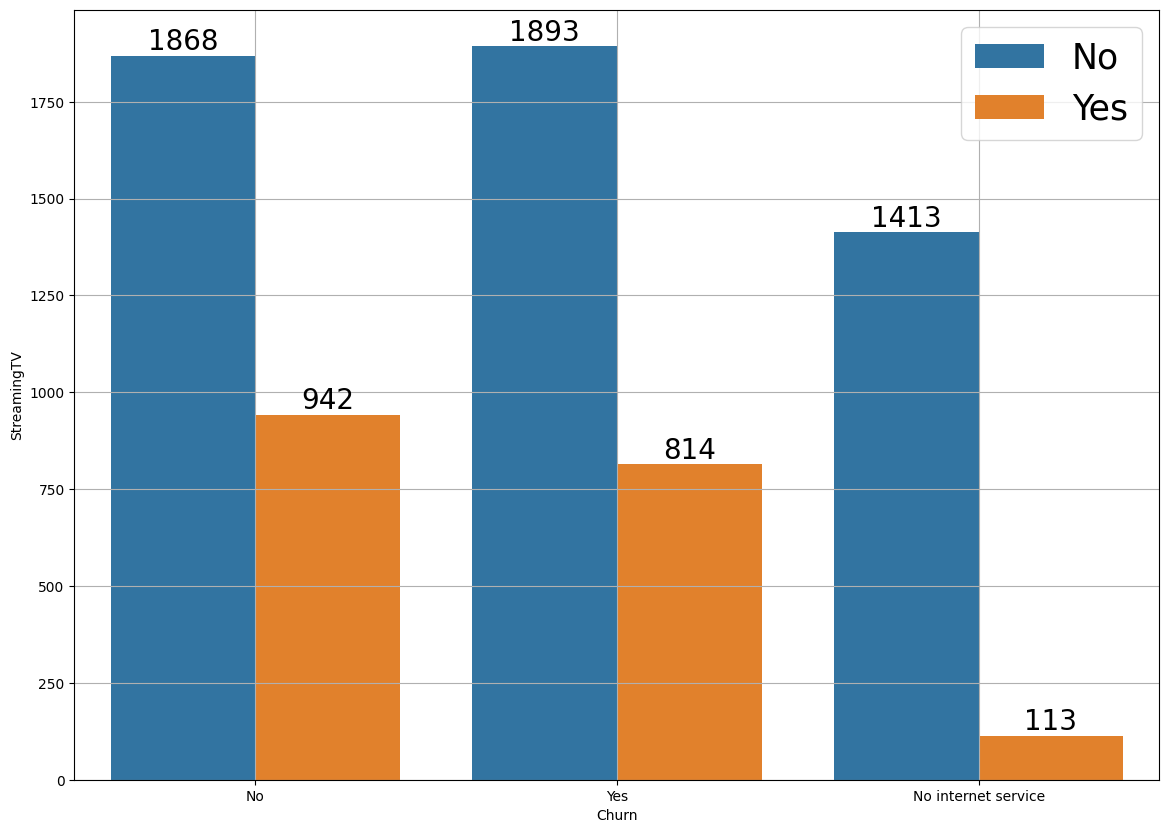

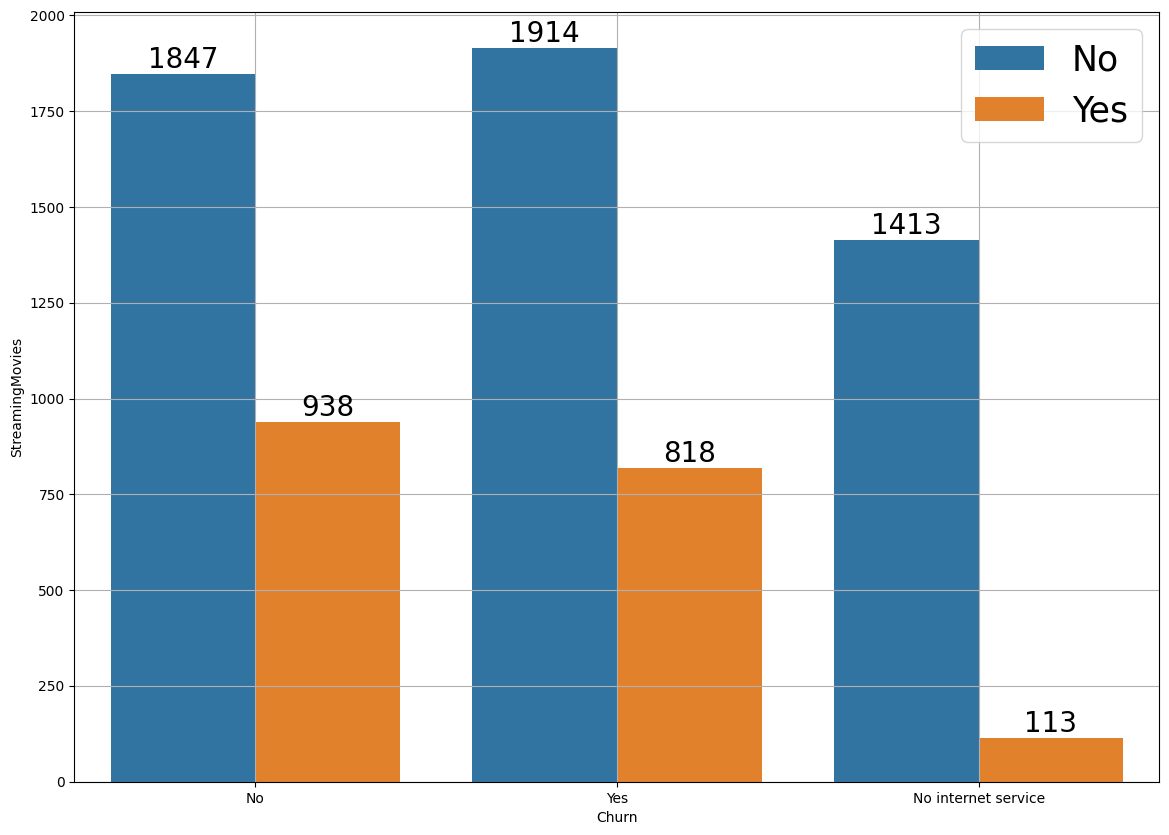

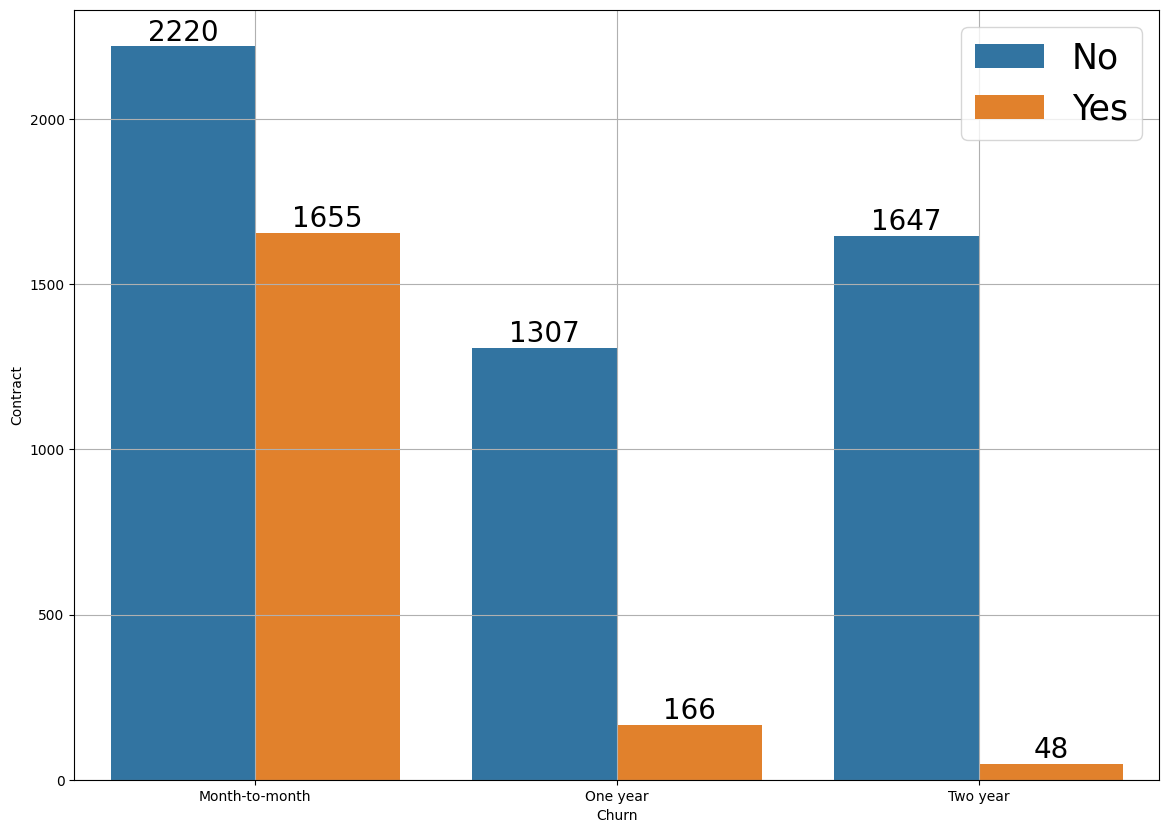

In [12]:
f(df, 'gender', 'Churn');
f(df, 'PaymentMethod', 'Churn');
f(df, 'PaperlessBilling', 'Churn');
f(df, 'Partner', 'Churn');
f(df, 'Dependents', 'Churn');
f(df, 'PhoneService', 'Churn');
f(df, 'MultipleLines', 'Churn');
f(df, 'InternetService', 'Churn');
f(df, 'OnlineSecurity', 'Churn');
f(df, 'OnlineBackup', 'Churn');
f(df, 'DeviceProtection', 'Churn');
f(df, 'TechSupport', 'Churn');
f(df, 'StreamingTV', 'Churn');
f(df, 'StreamingMovies', 'Churn');
f(df, 'Contract', 'Churn');

### Тип контракта - помесячная оплата сильно увеличивает отток, долгосрочные контракты снижают.
### Наличие партнера/иждивенцев - клиенты без семьи чаще уходят.
### Способ оплаты - электронные чеки ассоциируются с высоким оттоком, автоматические платежи - со стабильностью.
### Тип интернета - клиенты на оптоволокне более склонны к уходу.
### Дополнительные услуги - отсутствие онлайн-безопасности и техподдержки увеличивает отток.
### Телефонная служба - клиенты без телефонной службы менее склонны к уходу.
### Общая закономерность - клиенты с минимальным набором услуг и краткосрочными контрактами уходят чаще, а с полным пакетом услуг и долгосрочными обязательствами - остаются.



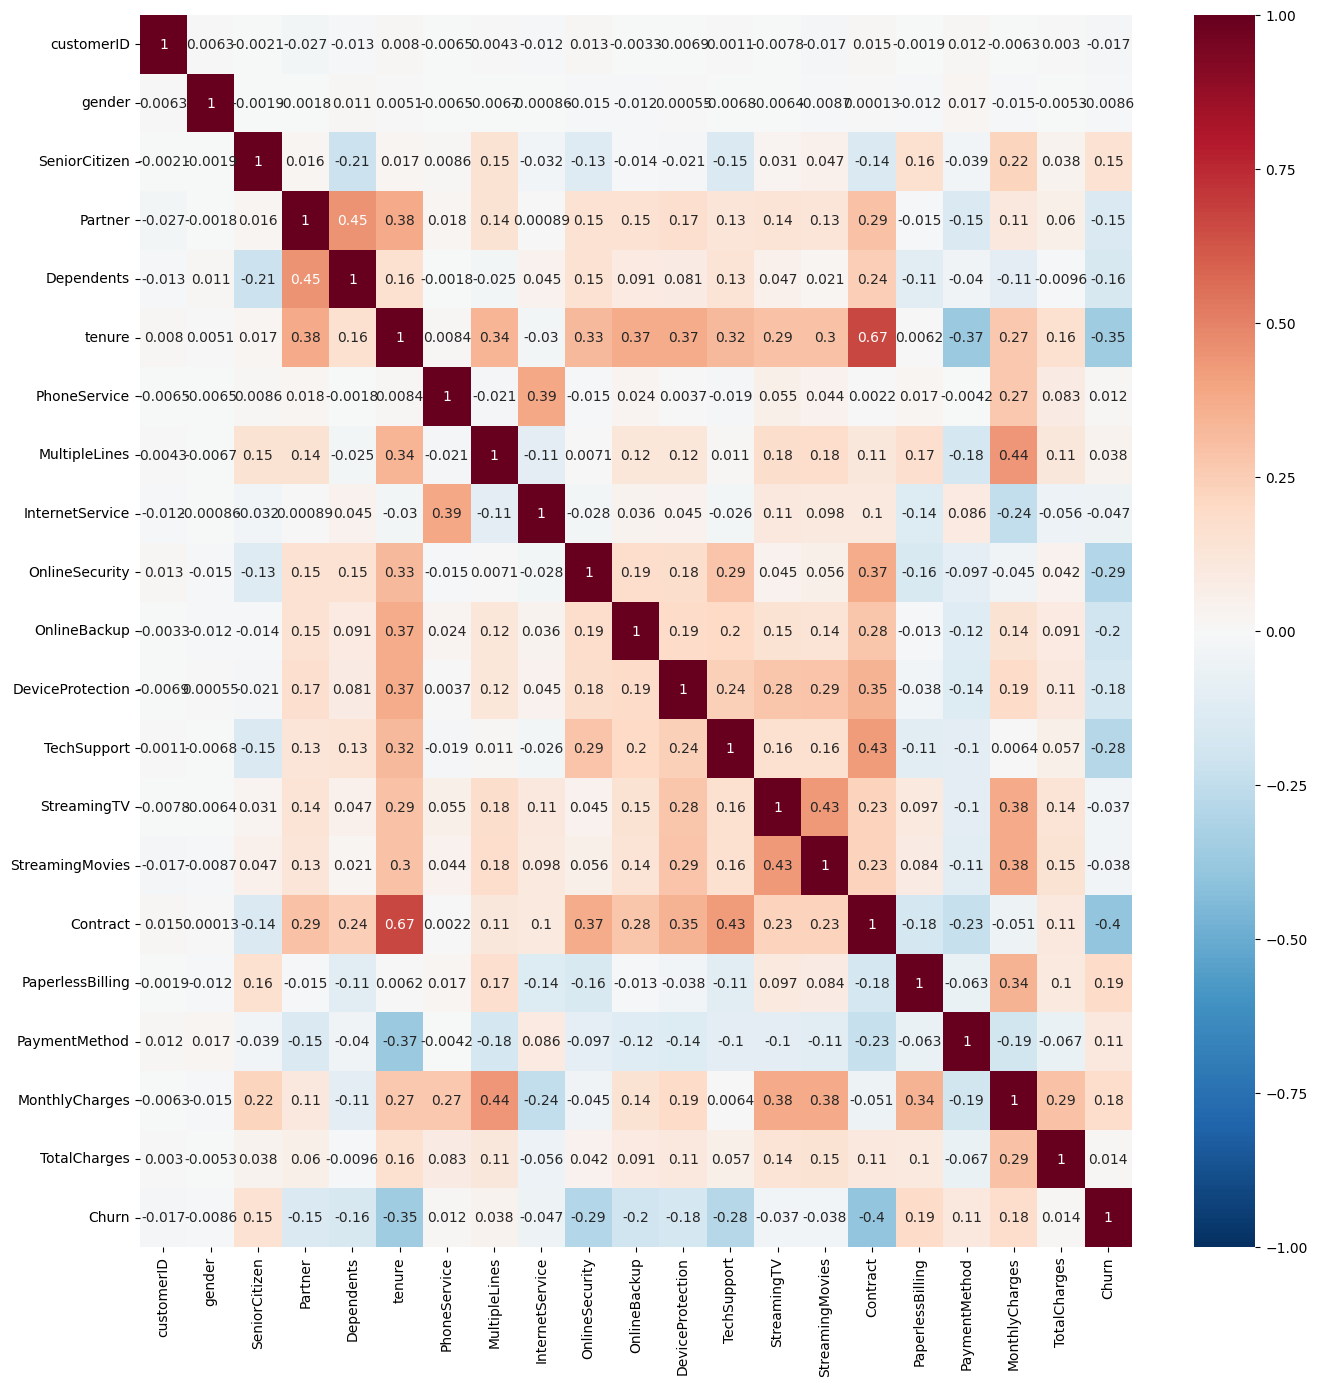

In [13]:
# Построение тепловой карты корреляций
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(dfe.corr(),
            vmin=-1, vmax=1,
            annot=True,
            cmap='RdBu_r',);

### Churn и tenure: -0.35 (чем больше срок обслуживания, тем меньше отток)
### Churn и Contract: -0.40 (долгосрочные контракты уменьшают отток)

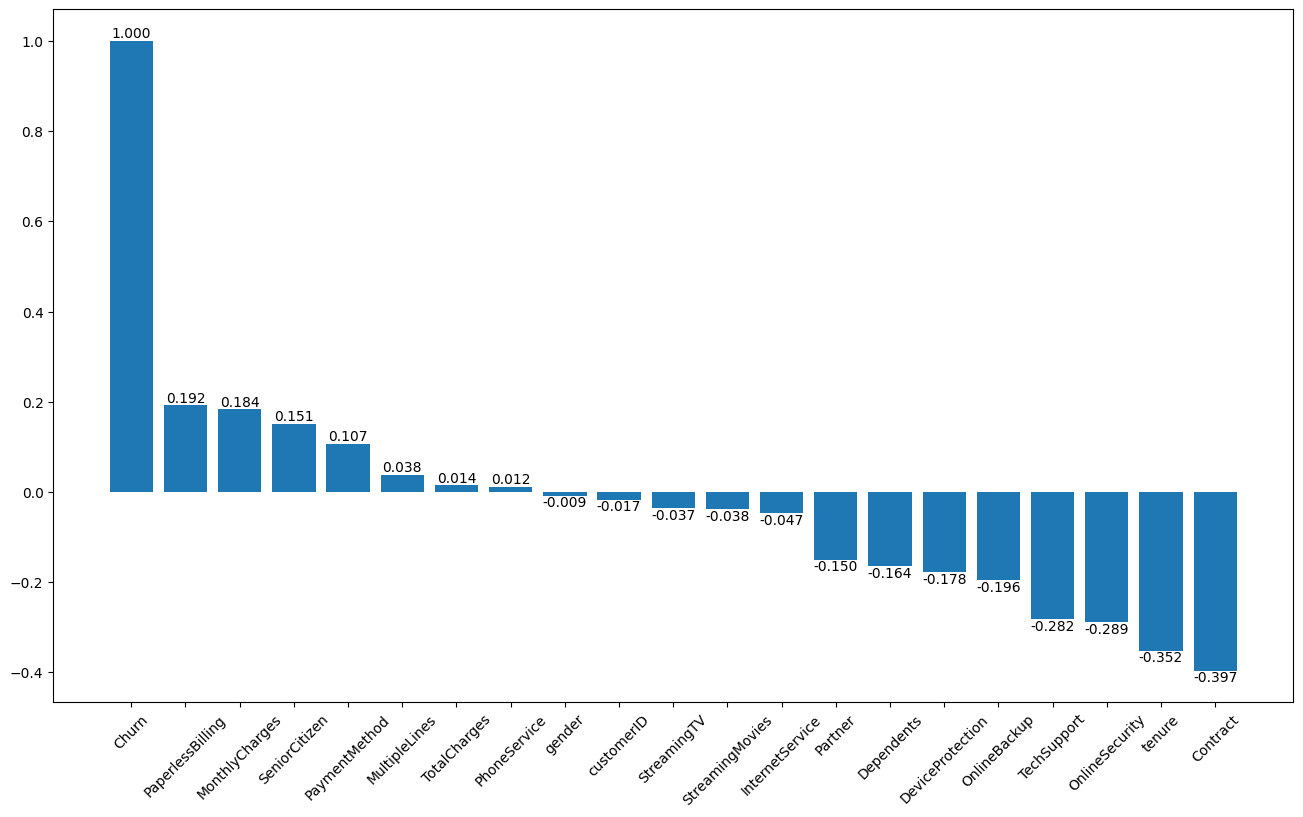

In [14]:
# Построение barplot корреляций с целевой переменной Churn
fig, ax = plt.subplots(figsize=(16, 9))
correlations = dfe.corr()['Churn'].sort_values(ascending=False)
features = correlations.index
values = correlations.values
ax.bar(features, values);
ax.tick_params(axis='x', rotation=45)
for c in ax.containers:
    ax.bar_label(c, fontsize=10, fmt = '%.3f')

In [77]:
from sklearn.model_selection import train_test_split

# Удаление некоррелирующих/ненужных и целевых признаков
dfe = dfe.drop(["customerID"], axis=1)  # ID клиента не влияет на отток
dfe = dfe.drop(["MonthlyCharges"], axis=1)  # дублирует информацию о услугах
dfe = dfe.drop(["TotalCharges"], axis=1)  # коррелирует с tenure
dfe = dfe.drop(["tenure"], axis=1)  # сильно коррелирует с контрактом

# Разделение на признаки и целевую переменную
dfey = dfe["Churn"]  # целевая переменная - отток
dfe = dfe.drop(["Churn"], axis=1)  # удаляем целевую переменную из признаков

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(dfe, 
                                                    dfey, 
                                                    test_size=0.25,  # 25% данных на тест
                                                    random_state=42)  # фиксируем случайность

In [34]:
# Импорт библиотек машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## Построение моделей

In [79]:
Log_R = LogisticRegression(max_iter=10000, penalty='l2')
Log_R.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [80]:
SV = svm.SVC()
SV.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [81]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [82]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
cat = CatBoostClassifier(iterations=10,
                        loss_function='Logloss')
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5472298	total: 12.8ms	remaining: 115ms
1:	learn: 0.4903826	total: 13.7ms	remaining: 54.8ms
2:	learn: 0.4642109	total: 14.6ms	remaining: 34ms
3:	learn: 0.4478986	total: 15.5ms	remaining: 23.2ms
4:	learn: 0.4374046	total: 16.4ms	remaining: 16.4ms
5:	learn: 0.4311787	total: 17.4ms	remaining: 11.6ms
6:	learn: 0.4266900	total: 18.4ms	remaining: 7.9ms
7:	learn: 0.4225106	total: 19.4ms	remaining: 4.85ms
8:	learn: 0.4211146	total: 20.2ms	remaining: 2.24ms
9:	learn: 0.4179122	total: 21.2ms	remaining: 0us


# Оценка качестваа моделей

In [84]:
# Импорт метрик для оценки качества моделей
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [85]:
# Функция для оценки качества моделей:
## Accuracy - общая точность предсказаний
## F1-score - баланс между precision и recall
def score(model):
    preds = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    print(f"Модель: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 30)

In [86]:
score(Log_R)
score(SV)
score(tree)
score(forest)
score(cat)

Модель: LogisticRegression
Accuracy: 0.7819
F1-score: 0.5362
------------------------------
Модель: SVC
Accuracy: 0.7808
F1-score: 0.5304
------------------------------
Модель: DecisionTreeClassifier
Accuracy: 0.7183
F1-score: 0.4723
------------------------------
Модель: RandomForestClassifier
Accuracy: 0.7598
F1-score: 0.5053
------------------------------
Модель: CatBoostClassifier
Accuracy: 0.7933
F1-score: 0.5787
------------------------------


In [ ]:
# CatBoost показал наилучшие результаты по обоим метрикам, 
# что делает его оптимальным выбором для данной задачи предсказания оттока клиентов.

In [87]:
# Функция для построения ROC-кривой:
def auc_plot(model):
    svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')

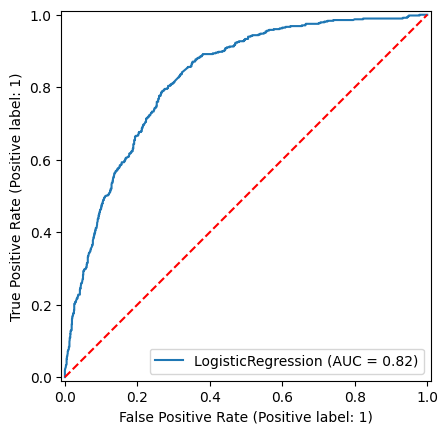

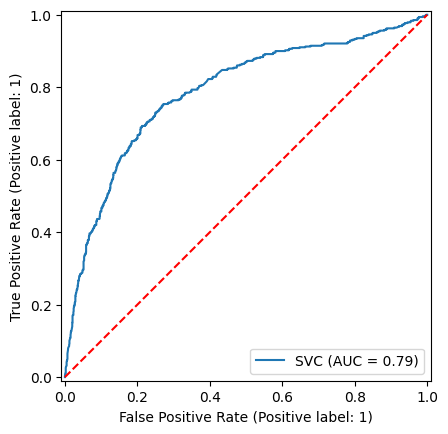

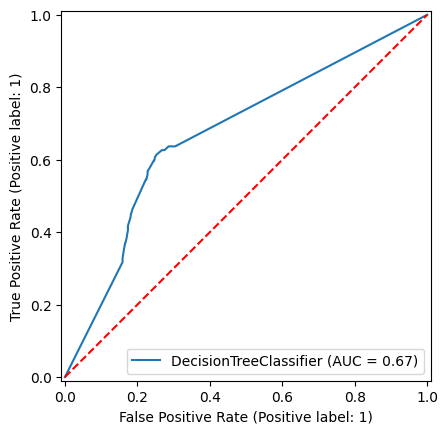

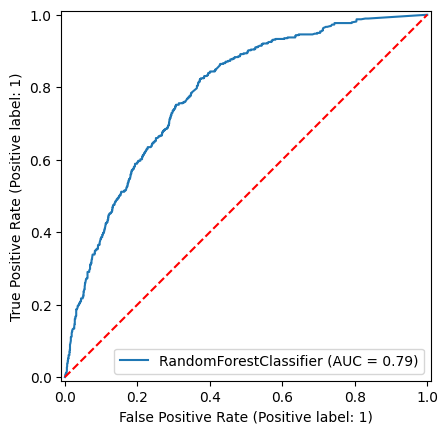

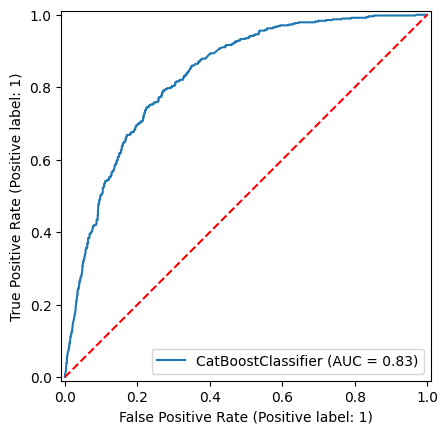

In [88]:
auc_plot(Log_R)
auc_plot(SV)
auc_plot(tree)
auc_plot(forest)
auc_plot(cat)

In [ ]:
# CatBoost показывает наилучшее качество (AUC = 0.83)
# LogisticRegression незначительно уступает (AUC = 0.82)
# Все модели кроме DecisionTree имеют AUC > 0.75 - удовлетворительное качество

In [ ]:
# Улучщение модели Catboost

In [89]:
# мпорт инструмента для подбора гиперпараметров моделей. 
# GridSearchCV автоматически перебирает комбинации параметров и находит оптимальные для максимального качества модели.
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'iterations': [100, 200, 500, 1000],  # количество итераций
    'learning_rate': [0.01, 0.05],         # скорость обучения
    'depth': [2, 4, 6],                    # глубина деревьев
    'l2_leaf_reg': [1, 3]                  # регуляризация L2
}

grid_search = GridSearchCV(
    estimator=cat,                         # модель CatBoost
    param_grid=param_grid,                 # сетка параметров
    cv=3,                                  # 3-кратная кросс-валидация
    scoring='accuracy',                    # метрика - точность
    n_jobs=-1                              # использование всех ядер процессора
)
grid_search.fit(x_train, y_train)          # запуск поиска
print("Best parameters:", grid_search.best_params_)  # лучшие параметры

0:	learn: 0.6645067	total: 1.14ms	remaining: 227ms
1:	learn: 0.6394915	total: 2.22ms	remaining: 220ms
2:	learn: 0.6197500	total: 3.23ms	remaining: 212ms
3:	learn: 0.6010734	total: 4.22ms	remaining: 207ms
4:	learn: 0.5859712	total: 5.43ms	remaining: 212ms
5:	learn: 0.5727348	total: 6.4ms	remaining: 207ms
6:	learn: 0.5637627	total: 7.38ms	remaining: 204ms
7:	learn: 0.5542943	total: 8.35ms	remaining: 200ms
8:	learn: 0.5455640	total: 9.37ms	remaining: 199ms
9:	learn: 0.5378467	total: 10.4ms	remaining: 197ms
10:	learn: 0.5286464	total: 11.4ms	remaining: 196ms
11:	learn: 0.5220145	total: 12.4ms	remaining: 194ms
12:	learn: 0.5146945	total: 13.4ms	remaining: 193ms
13:	learn: 0.5095243	total: 14.4ms	remaining: 192ms
14:	learn: 0.5033037	total: 15.4ms	remaining: 191ms
15:	learn: 0.4974417	total: 16.4ms	remaining: 189ms
16:	learn: 0.4935950	total: 17.4ms	remaining: 188ms
17:	learn: 0.4893994	total: 18.5ms	remaining: 187ms
18:	learn: 0.4857076	total: 19.5ms	remaining: 186ms
19:	learn: 0.4831792	to

In [108]:
# Создание и обучение оптимизированной версии CatBoost с подобранными гиперпараметрами для улучшения качества предсказаний.
cat2 = CatBoostClassifier(depth = 2,
                         iterations =700,
                         l2_leaf_reg = 1,
                         learning_rate = 0.05)
cat2.fit(x_train, y_train)

0:	learn: 0.6645065	total: 1.36ms	remaining: 948ms
1:	learn: 0.6394917	total: 2.71ms	remaining: 945ms
2:	learn: 0.6183569	total: 3.72ms	remaining: 864ms
3:	learn: 0.5991232	total: 4.72ms	remaining: 822ms
4:	learn: 0.5843252	total: 5.74ms	remaining: 797ms
5:	learn: 0.5699850	total: 6.68ms	remaining: 773ms
6:	learn: 0.5568336	total: 7.61ms	remaining: 754ms
7:	learn: 0.5458275	total: 8.57ms	remaining: 741ms
8:	learn: 0.5380423	total: 9.54ms	remaining: 732ms
9:	learn: 0.5306899	total: 10.5ms	remaining: 723ms
10:	learn: 0.5226146	total: 11.5ms	remaining: 717ms
11:	learn: 0.5166589	total: 12.4ms	remaining: 713ms
12:	learn: 0.5111431	total: 13.4ms	remaining: 709ms
13:	learn: 0.5050758	total: 14.4ms	remaining: 706ms
14:	learn: 0.4987728	total: 15.4ms	remaining: 705ms
15:	learn: 0.4938683	total: 16.4ms	remaining: 702ms
16:	learn: 0.4905290	total: 17.4ms	remaining: 699ms
17:	learn: 0.4872366	total: 18.4ms	remaining: 697ms
18:	learn: 0.4842040	total: 19.6ms	remaining: 703ms
19:	learn: 0.4814729	t

In [109]:
score(cat)
score(cat2)

Модель: CatBoostClassifier
Accuracy: 0.7933
F1-score: 0.5787
------------------------------
Модель: CatBoostClassifier
Accuracy: 0.7990
F1-score: 0.5940
------------------------------


In [ ]:
# Модель стала лучше предсказывать отток клиентов после подбора гиперпараметров.

In [110]:
# Анализ важности признаков - показывает, какие факторы больше всего влияют на предсказание оттока клиентов.
feature_importance_cb = cat2.get_feature_importance()  # получение важности признаков

# Создание DataFrame
importance_df = pd.DataFrame({
    'feature': x_train.columns,              # названия признаков
    'importance': feature_importance_cb      # значения важности
})
importance_df = importance_df.sort_values('importance', ascending=False)  # сортировка по убыванию
importance_df  # вывод таблицы

,feature,importance
13,Contract,49.676874
7,OnlineSecurity,12.164608
10,TechSupport,7.794813
6,InternetService,5.972028
15,PaymentMethod,5.545993
12,StreamingMovies,4.228187
8,OnlineBackup,3.429252
14,PaperlessBilling,2.676960
11,StreamingTV,1.832439
1,SeniorCitizen,1.701599


In [137]:
probabilities = cat2.predict_proba(x_test)  # вероятности предсказаний
predictions = cat2.predict(x_test)          # бинарные предсказания

# Создаем DataFrame с результатами
results_df = x_test.copy()
results_df['Prediction'] = predictions  # предсказанный класс (0/1)
results_df['Probability_No'] = probabilities[:, 0]  # вероятность "не уйдет"
results_df['Probability_Yes'] = probabilities[:, 1]  # вероятность "уйдет"

# Разделяем на уходящих и остающихся клиентов
churn_df = results_df[results_df['Prediction'] == 1]  # предсказанный отток
no_churn_df = results_df[results_df['Prediction'] == 0]  # предсказанные лояльные

# Сортируем по уверенности модели
churn_df_sorted = churn_df.sort_values('Probability_Yes', ascending=False)  # самые вероятные оттоки
no_churn_df_sorted = no_churn_df.sort_values('Probability_No', ascending=True)  # самые сомнительные лояльные

In [141]:
churn_df_sorted

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Prediction,Probability_No,Probability_Yes
2516,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.241651,0.758349
1410,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.241651,0.758349
4307,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.241651,0.758349
1360,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.241651,0.758349
5863,0,0,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.242450,0.757550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0.492866,0.507134
479,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0.492923,0.507077
2471,0,0,1,0,1,2,1,0,2,0,0,2,2,0,1,1,1,0.495380,0.504620
2954,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,3,1,0.496065,0.503935


# # ИТОГИ ПРОЕКТА: СИСТЕМА ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ
# 
# ## Ключевые результаты:
# - **Точность модели:** 79.9%
# - **F1-score:** 0.594 | **AUC:** 0.83
# - **Главные факторы оттока:** тип контракта, онлайн-безопасность, способ оплаты
# 
# ## Практическое применение в бизнесе:
# 
# ### 1. Приоритизация обзвона клиентов
# - Фокус на клиентах с вероятностью оттока >80% (топ-20% из churn_df_sorted)
# - **Результат:** Увеличение эффективности кол-центра
# 
# ### 2. Персонализированные предложения
# - Клиентам с месячным контрактом + электронные чеки → предложить переход на годовой контракт с автоплатежом
# - **Результат:** Уменьшение оттока в целевой группе
# 
# ### 3. Прогноз финансовых потерь
# - Модель предсказывает не только кто уйдет, но и как много (объем потерянной выручки)
# - **Результат:** точное планирование бюджета на удержание
# 
# ## Технологический стек:
# - Python, Pandas, NumPy
# - Scikit-learn, CatBoost
# - Matplotlib, Seaborn
# 